# AUDIO PROJECT 3 - MUSIC SYNCHRONIZATION #
## 1. Description ##

## 2. Implementation ##
### 2.1 Initialization ###

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import librosa
import librosa.display
import sounddevice as sd

#### Load files and trim the silence part in each audio file

In [2]:
files = ["antti_yesterday.wav",
         "ferenc_yesterday.wav",
         "johanna_yesterday.wav",
         "outi_yesterday.wav"]
audio = []
fs = 0
for f in files:
    signal,fs = librosa.load("../data/" + f)
    signal,index = librosa.effects.trim(signal)
    audio.append(signal)

#### Overview on given signal ####

Playing antti_yesterday
Size: 378880
Playing ferenc_yesterday
Size: 433664
Playing johanna_yesterday
Size: 418304
Playing outi_yesterday
Size: 407040


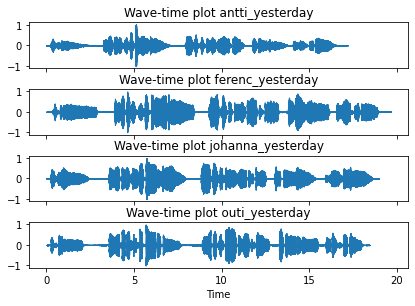

In [7]:
# Plot wave-time 4 signals - help function:
def plot_wave_time(signals,files,play_sound=False):
    fig, ax = plt.subplots(nrows=signals.__len__(),
                           sharex=True,
                           sharey=True,
                           figsize=(16,9))
    fig.tight_layout()
    for i,a in enumerate(signals):
        file_name = files[i].split('.')[0]
        print("Playing " + file_name)
        librosa.display.waveshow(a,sr=fs,ax=ax[i])
        ax[i].set(title="Wave-time plot " + file_name)
        ax[i].label_outer()
        if play_sound:
            sd.play(a,samplerate=fs,blocking="true")
        print("Size: " + str(a.size))

plot_wave_time(audio,files)

**Observation:**
- Audio signals have different lengths.
- The pattern in the audio signals (of the same music piece) are already recognizable.

**Decision**
- Time-stretch the last 3 signal based on the 1st.
- Stretch factor can be the ratio between signal's size

Playing antti_yesterday
Size: 378880
Playing ferenc_yesterday
Size: 378880
Playing johanna_yesterday
Size: 378880
Playing outi_yesterday
Size: 378880


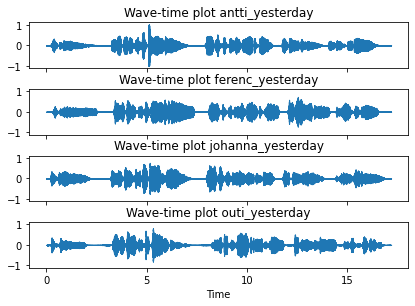

In [8]:
stretched_signals = []
for a in audio:
    stretch_factor = a.size/audio[0].size
    stretched_signal = librosa.effects.time_stretch(a,stretch_factor)
    stretched_signals.append(stretched_signal)
plot_wave_time(stretched_signals, files,play_sound=True)

**Comment:** The 3 later signals are shrinked down to the same size as the 1st signal, they
also heard a bit faster in pace.

### 2.2 Chroma features extract ###

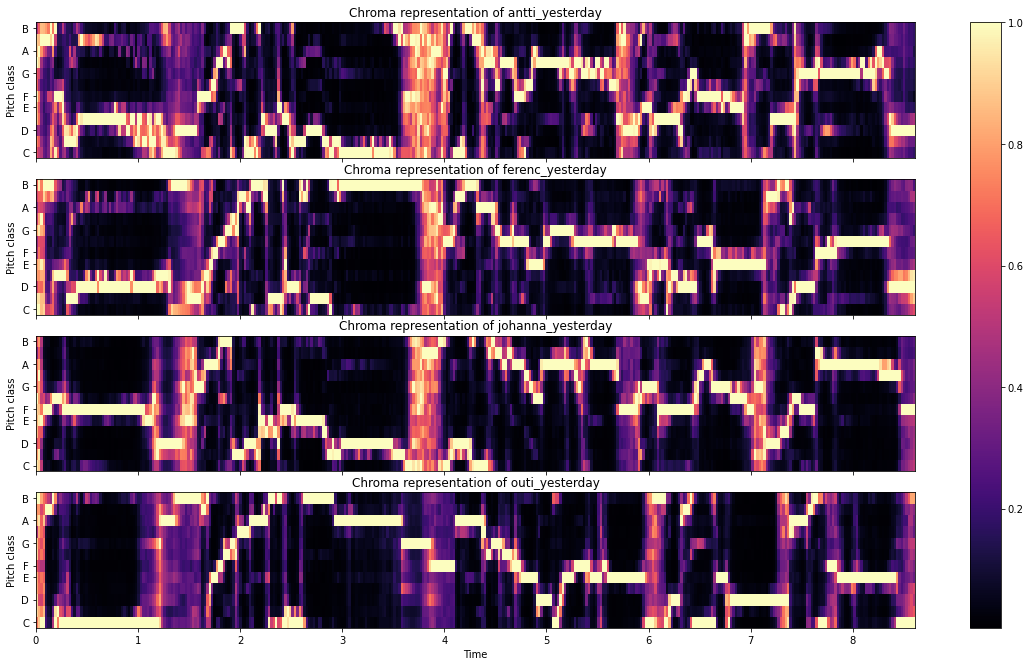

In [26]:
# Help function to plot chroma presentation of signals
def plot_chroma(chroma,files):
    fig, ax = plt.subplots(nrows=chroma.__len__(),
                           sharex=True,
                           figsize=(16,9))
    fig.tight_layout()
    img = []
    for i,a in enumerate(chroma):
        file_name = files[i].split('.')[0]
        img = librosa.display.specshow(a,
                                 x_axis="time",
                                 y_axis="chroma",
                                 ax=ax[i])
        ax[i].set(title="Chroma representation of " + file_name)
        ax[i].label_outer()
    fig.colorbar(img,ax=ax)

hop_length = 1024
chroma_stretched = []
for s in stretched_signals:
    chroma_stretched.append(librosa.feature.chroma_cqt(y=s,sr=fs,hop_length=hop_length))

plot_chroma(chroma_stretched,files)

### Chroma sequences alignment ###

Examine ferenc_yesterday.wav
Examine johanna_yesterday.wav
Examine outi_yesterday.wav


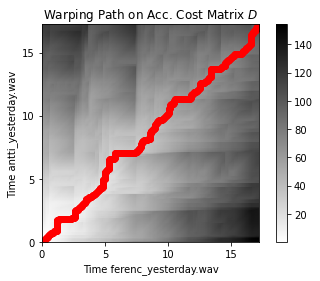

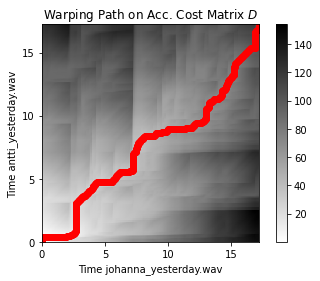

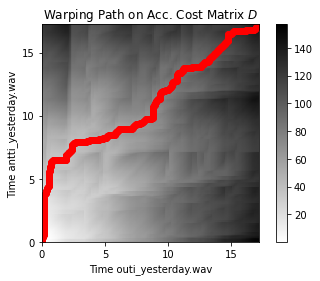

In [27]:
def plot_chroma_aligned(chroma, files):
    for i,c in enumerate(chroma[1:]):
        D, wp = librosa.sequence.dtw(X=chroma[0],Y=c,metric='cosine')
        wp_s = librosa.frames_to_time(wp,sr=fs,hop_length=hop_length)
        fig, ax = plt.subplots()
        img = librosa.display.specshow(D, x_axis='time', y_axis='time', sr=fs,
                                       cmap='gray_r', hop_length=hop_length, ax=ax)
        ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
        ax.set(title='Warping Path on Acc. Cost Matrix $D$',
               xlabel='Time ' + files[i+1], ylabel='Time ' + files[0])
        fig.colorbar(img, ax=ax)

plot_chroma_aligned(chroma_stretched,files)

Examine ferenc_yesterday.wav
Examine johanna_yesterday.wav
Examine outi_yesterday.wav


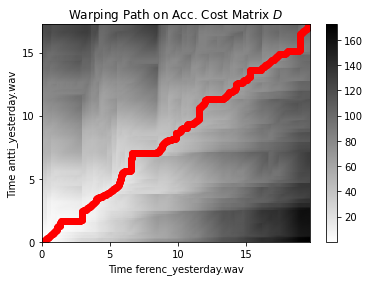

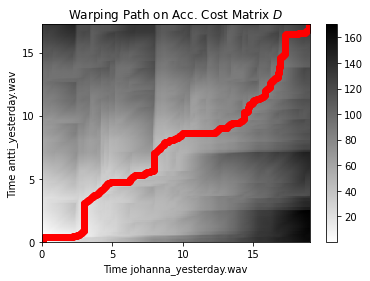

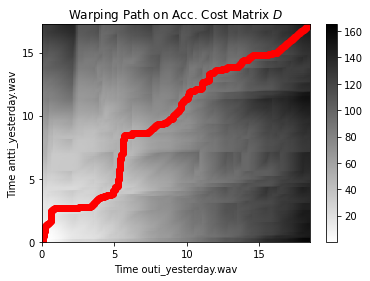

In [30]:
chroma = []
for a in audio:
    chroma.append(librosa.feature.chroma_cqt(y=a,
                                             hop_length=hop_length,
                                             sr=fs))
plot_chroma_aligned(chroma,files)

### 2.3 Evaluate ###
 TODO create a script to randomly switch between audio signal to check if we successfully synchronize them

In [37]:
stop_points = np.arange(2000,12000,2000)
switch_order = np.arange(5)

[ 2000  4000  6000  8000 10000]
[0 1 2 3 4]
